# Importar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score)


# Importar datos 

In [2]:
train = pd.read_csv('/content/drive/MyDrive/datasetshopping.csv')
train.head(4)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False


In [3]:
print(train.keys())

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [4]:
print(train.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

# Estudio de datos de forma gráfica

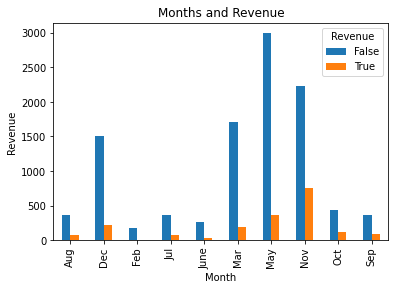

In [5]:
pd.crosstab(train.Month, train.Revenue).plot(kind='bar')
plt.title('Months and Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.savefig('month_revenue')

# Nomalización de datos

In [6]:
print(set(train.Month))

months = {'Nov': 11, 'Sep': 9, 'Feb': 2, 'Jul': 7, 'Oct': 10, 'Dec': 12, 'Aug': 8, 'June': 6, 'Mar': 3, 'May': 5}
train.Month = train.Month.map(months)

print(set(train.Month))

{'May', 'Feb', 'Oct', 'Dec', 'June', 'Mar', 'Jul', 'Sep', 'Aug', 'Nov'}
{2, 3, 5, 6, 7, 8, 9, 10, 11, 12}


In [7]:
print(set(train.VisitorType))

visitors = {'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 0}
train.VisitorType = train.VisitorType.map(visitors)

print(set(train.VisitorType))

{'Other', 'Returning_Visitor', 'New_Visitor'}
{0, 1}


# Datos de entrenamiento y prueba

In [8]:
X = train.drop(columns=['Revenue'])
y = train.Revenue

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

print(X_train)

       Administrative  Administrative_Duration  Informational  \
3868                0                 0.000000              0   
11609               2               255.000000              0   
11634               0                 0.000000              0   
5656                2               194.900000              0   
7352                0                 0.000000              0   
...               ...                      ...            ...   
6892                8               279.280000              0   
8540                4                28.500000              0   
9962                4               184.458333              1   
9557                0                 0.000000              0   
5306                0                 0.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
3868                 0.000000              50              1735.595238   
11609                0.000000              10               173.433333 

# Escalar los datos

In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[-0.70126814 -0.45590678 -0.39495145 ... -0.75820251  0.41075586
  -0.55283398]
 [-0.10208161  0.96598158 -0.39495145 ... -0.75820251  0.41075586
   1.8088613 ]
 [-0.70126814 -0.45590678 -0.39495145 ... -0.26498461  0.41075586
   1.8088613 ]
 ...
 [ 0.49710492  0.57263893  0.38374155 ... -0.75820251  0.41075586
   1.8088613 ]
 [-0.70126814 -0.45590678 -0.39495145 ... -0.75820251  0.41075586
  -0.55283398]
 [-0.70126814 -0.45590678 -0.39495145 ... -0.26498461  0.41075586
  -0.55283398]]


# Entrenar el modelo

In [11]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

print(y_pred)

[False False False ... False False False]


# Predecir el modelo

In [13]:
matrix = confusion_matrix(y_test, y_pred)

print('Matriz de Confusión:')
print(matrix)

Matriz de Confusión:
[[2062   41]
 [ 251  112]]


In [14]:
precision = precision_score(y_test, y_pred)

print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7320261437908496


In [15]:
accuracy = accuracy_score(y_test, y_pred)

print('Exactitud del modelo:')
print(accuracy)

Exactitud del modelo:
0.8815896188158961
